In [79]:
#Importing necessary libraries

import random as rn
import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda, Reshape
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import  Activation
from keras.optimizers import SGD, RMSprop, Adam
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
#Defining the path to the data directories
#One path will be for the csv which contains information about the classification and the other is folder with the images

df = pd.read_csv('Galaxy_Classes.csv')
pic_all = "C:/python_lessons/January_Project/images/"
categories = ['Irregular','Spiral','Elliptical'] #Categories currently working with

In [3]:
df.head(10)

,objid,sample,asset_id,gz2_class,category
0,5.880000e+17,original,3,Sc?l,Spiral
1,5.880000e+17,original,4,Sc?l,Spiral
2,5.880000e+17,original,5,Er,Elliptical
3,5.880000e+17,original,6,Sc1t,Spiral
4,5.880000e+17,original,7,Sc1t,Spiral
5,5.880000e+17,original,8,Sc1t,Spiral
6,5.880000e+17,original,9,Sc1t,Spiral
7,5.880000e+17,original,11,Sb,Spiral
8,5.880000e+17,original,12,Sb,Spiral
9,5.880000e+17,original,13,Ec,Elliptical


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


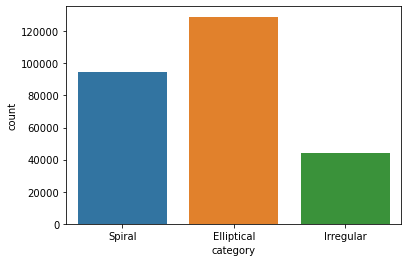

In [4]:
sns.countplot(df['category']);

The least amount of records are 40'000 rows of irregulars which is more than needed for ML (around 300 images). Therefore, undersampling the data to the irregular level and then shuffling the data around as well.

In [5]:
#Now selecting only a sample of 600 records from the dataframe and creating a new one which will be used in extracting images

df_sample = df.sample(n=600, replace=False, random_state=1)

In [6]:
df_sample

,objid,sample,asset_id,gz2_class,category
201076,5.880000e+17,original,219288,Ei,Elliptical
244334,5.880000e+17,extra,265845,Er,Elliptical
196847,5.880000e+17,original,214930,Sc2t,Spiral
168257,5.880000e+17,original,181898,SBb2m,Irregular
236083,5.880000e+17,extra,256678,Sc?t,Spiral
...,...,...,...,...,...
98725,5.880000e+17,original,107958,SBb?m,Irregular
38533,5.880000e+17,original,44096,SBb2t,Spiral
27290,5.880000e+17,original,30986,Sc,Spiral
201558,5.880000e+17,original,219791,SBc,Spiral


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


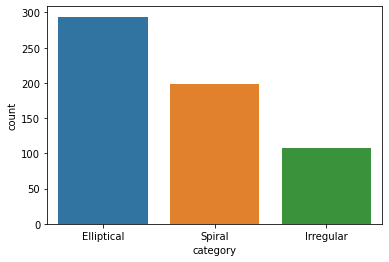

In [7]:
sns.countplot(df_sample['category']);

In [8]:
#Making a copy of the column being encoded

df_sample['category_encoded'] = df_sample['category']

In [9]:
df_sample.head()

,objid,sample,asset_id,gz2_class,category,category_encoded
201076,5.880000e+17,original,219288,Ei,Elliptical,Elliptical
244334,5.880000e+17,extra,265845,Er,Elliptical,Elliptical
196847,5.880000e+17,original,214930,Sc2t,Spiral,Spiral
168257,5.880000e+17,original,181898,SBb2m,Irregular,Irregular
236083,5.880000e+17,extra,256678,Sc?t,Spiral,Spiral


In [10]:
#Label encoding the category (target) feature in the data frame

le = LabelEncoder()
df_sample['category_encoded'] = le.fit_transform(df_sample['category_encoded'])

In [11]:
df_sample

,objid,sample,asset_id,gz2_class,category,category_encoded
201076,5.880000e+17,original,219288,Ei,Elliptical,0
244334,5.880000e+17,extra,265845,Er,Elliptical,0
196847,5.880000e+17,original,214930,Sc2t,Spiral,2
168257,5.880000e+17,original,181898,SBb2m,Irregular,1
236083,5.880000e+17,extra,256678,Sc?t,Spiral,2
...,...,...,...,...,...,...
98725,5.880000e+17,original,107958,SBb?m,Irregular,1
38533,5.880000e+17,original,44096,SBb2t,Spiral,2
27290,5.880000e+17,original,30986,Sc,Spiral,2
201558,5.880000e+17,original,219791,SBc,Spiral,2


In [12]:
df_ellipticals = df_sample[df_sample.category_encoded == 0]
df_spirals = df_sample[df_sample.category_encoded == 2]
df_irreg = df_sample[df_sample.category_encoded==1]

In [13]:
#Undersampling and shuffling data to irregular level

df_Eusampled = df_ellipticals.sample(n=len(df_irreg), random_state=101)
df_Susampled = df_spirals.sample(n=len(df_irreg), random_state=101)
df_balanced = pd.concat([df_Eusampled,df_Susampled, df_irreg],axis=0)

In [14]:
#Shuffling the data and resetting the index

df_processed = df_balanced.sample(frac=1).reset_index(drop=True)

df_processed

,objid,sample,asset_id,gz2_class,category,category_encoded
0,5.880000e+17,extra,249243,Ec,Elliptical,0
1,5.880000e+17,original,187087,SBc?t,Spiral,2
2,5.880000e+17,stripe82,288400,Ei,Elliptical,0
3,5.880000e+17,extra,265845,Er,Elliptical,0
4,5.880000e+17,original,11262,Er,Elliptical,0
...,...,...,...,...,...,...
316,5.880000e+17,original,8691,SBb3t,Spiral,2
317,5.880000e+17,original,53898,SBc2m,Irregular,1
318,5.880000e+17,extra,266444,SBb(r),Spiral,2
319,5.880000e+17,original,15966,SBb,Spiral,2


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


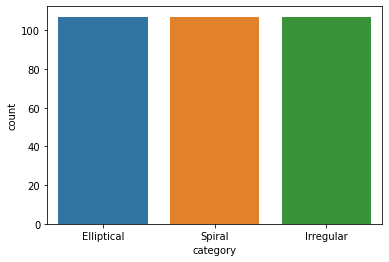

In [15]:
sns.countplot(df_processed['category']);

Now there are 107 records of each of 3 categories. The data has been balanced, encoded and shuffled. Next, can grab their image counterparts from the image folder to start the CNN model.

In [16]:
#Splitting the data into training and testing sets in the dataframe

training_data = df_processed.sample(frac=0.8, random_state=25)

testing_data = df_processed.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 257
No. of testing examples: 64


In [17]:
#Resetting the index, otherwise the matching with the image won't work

training_data = training_data.reset_index(drop=True)
testing_data = testing_data.reset_index(drop=True)

In [18]:
training_data.head()

,objid,sample,asset_id,gz2_class,category,category_encoded
0,5.880000e+17,original,112230,Sb(r),Spiral,2
1,5.880000e+17,original,217937,Ser,Elliptical,0
2,5.880000e+17,stripe82,290458,Ei,Elliptical,0
3,5.880000e+17,original,107940,Sb?t(r),Spiral,2
4,5.880000e+17,original,99640,Sc(m),Irregular,1


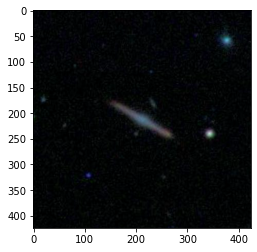

In [19]:
#Collecting all the images according to the dataframe training data

training_images = []

for i in range(0, len(training_data)):
    photor = cv.imread(pic_all + str(training_data['asset_id'][i]) + '.jpg')
    training_images.append(photor)

plt.imshow(training_images[1]) #Displaying one image in the list

In [20]:
len(training_images)

257

In [21]:
testing_data.head()

,objid,sample,asset_id,gz2_class,category,category_encoded
0,5.880000e+17,stripe82,288400,Ei,Elliptical,0
1,5.880000e+17,original,53872,Sc?t,Spiral,2
2,5.880000e+17,extra,264965,SBd(i),Spiral,2
3,5.880000e+17,original,32683,SBb2m,Irregular,1
4,5.880000e+17,original,187570,Sc?t,Spiral,2


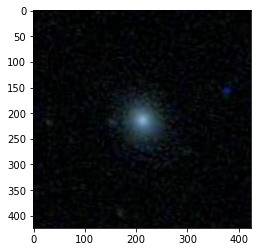

In [22]:
#Collecting all the images corresponding to the testing data

testing_images = []

for i in range(0, len(testing_data)):
    photor = cv.imread(pic_all + str(testing_data['asset_id'][i]) + '.jpg')
    testing_images.append(photor)

plt.imshow(testing_images[1])

In [23]:
len(testing_images)

64

In [24]:
from PIL import Image
with Image.open(pic_all+"247457.jpg") as img:
    width, height = img.size

In [25]:
width, height

(424, 424)

In [26]:
#Adding the jpg to the end of the id

training_data['asset_id'] = training_data['asset_id'].astype(str)
testing_data['asset_id'] = testing_data['asset_id'].astype(str)

def append_ext(fn):
    return fn+".jpg"

training_data["asset_id"]=training_data["asset_id"].apply(append_ext)
testing_data["asset_id"]=testing_data["asset_id"].apply(append_ext)

In [67]:
#Using image data generator module to match the labels in the dataframe with the images in another folder

import keras_preprocessing

from keras_preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator()

train_generator=datagen.flow_from_dataframe(
dataframe=training_data,
directory= pic_all,
x_col="asset_id",
y_col="category",
subset="training",
batch_size=60,
seed=42,
shuffle=True,
validate_filenames=True,
class_mode="categorical",
target_size=(424,424))

test_datagen=ImageDataGenerator()
test_generator=test_datagen.flow_from_dataframe(
dataframe=testing_data,
directory=pic_all,
x_col="asset_id",
y_col="category",
batch_size=60,
seed=42,
shuffle=False,
validate_filenames=True,
class_mode="categorical",
target_size=(424,424))

Found 221 validated image filenames belonging to 3 classes.
Found 58 validated image filenames belonging to 3 classes.


C:\Users\HelenLuhaar\anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 36 invalid image filename(s) in x_col="asset_id". These filename(s) will be ignored.
  warnings.warn(
C:\Users\HelenLuhaar\anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 6 invalid image filename(s) in x_col="asset_id". These filename(s) will be ignored.
  warnings.warn(


In [28]:
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.optimizers import RMSprop

In [29]:
#Training the model

model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=(424,424,3)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='RMSprop',loss="categorical_crossentropy",metrics=["accuracy"])

In [81]:
len(model.layers) #there are 17 layers

17

In [30]:
#Fitting the model

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history_cnn = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=10)
#model.fit_generator(generator=train_generator,
                    #steps_per_epoch=STEP_SIZE_TRAIN,
                    #epochs=10)


C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_7032\1685332554.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_cnn = model.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=10)


Epoch 1/10
6/6 [==============================] - 80s 13s/step - loss: 1067.3169 - accuracy: 0.3810
Epoch 2/10
6/6 [==============================] - 79s 13s/step - loss: 2.9131 - accuracy: 0.3651
Epoch 3/10
6/6 [==============================] - 77s 13s/step - loss: 1.1641 - accuracy: 0.3545
Epoch 4/10
6/6 [==============================] - 77s 13s/step - loss: 1.0999 - accuracy: 0.3915
Epoch 5/10
6/6 [==============================] - 71s 11s/step - loss: 1.0935 - accuracy: 0.3968
Epoch 6/10
6/6 [==============================] - 75s 12s/step - loss: 0.9736 - accuracy: 0.5608
Epoch 7/10
6/6 [==============================] - 76s 13s/step - loss: 0.9221 - accuracy: 0.6825
Epoch 8/10
6/6 [==============================] - 77s 13s/step - loss: 1.0149 - accuracy: 0.6878
Epoch 9/10
6/6 [==============================] - 77s 13s/step - loss: 0.7069 - accuracy: 0.7513
Epoch 10/10
6/6 [==============================] - 77s 13s/step - loss: 0.7476 - accuracy: 0.7672


In [68]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_7032\2076935646.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred=model.predict_generator(test_generator,


1/1 [==============================] - 3s 3s/step


In [44]:
score = model.evaluate_generator(train_generator)
print('loss:', score[0])
print('accuracy:', score[1])

C:\Users\HelenLuhaar\AppData\Local\Temp\ipykernel_7032\1099212622.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(train_generator)


loss: 0.46396052837371826
accuracy: 0.9819004535675049


In [69]:
pred

array([[0.3016801 , 0.38896185, 0.30935803],
       [0.31905296, 0.21242453, 0.46852246],
       [0.3278758 , 0.22003308, 0.45209113],
       [0.44515324, 0.3824899 , 0.17235692],
       [0.19635357, 0.31771904, 0.48592737],
       [0.2263709 , 0.28237596, 0.4912532 ],
       [0.4187107 , 0.20154531, 0.379744  ],
       [0.26529288, 0.26195154, 0.47275552],
       [0.3115947 , 0.25297338, 0.43543196],
       [0.32619733, 0.30332154, 0.37048113],
       [0.24826065, 0.21496639, 0.53677297],
       [0.33044964, 0.30306193, 0.36648843],
       [0.32777268, 0.28386712, 0.38836014],
       [0.38156956, 0.29516184, 0.32326856],
       [0.0591061 , 0.05237073, 0.8885232 ],
       [0.30034262, 0.3239677 , 0.3756896 ],
       [0.29872194, 0.25675285, 0.44452527],
       [0.45433462, 0.291863  , 0.2538024 ],
       [0.27922764, 0.27458066, 0.44619167],
       [0.16556303, 0.42981747, 0.40461951],
       [0.32266662, 0.3061    , 0.37123343],
       [0.2837019 , 0.3235241 , 0.39277405],
       [0.

In [70]:
predicted_class_indices=np.argmax(pred,axis=1)

In [71]:
predicted_class_indices

array([1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2], dtype=int64)

In [72]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [75]:
true_values = [labels[k] for k in test_generator.classes]

In [73]:
test_generator.filenames,predictions,labels

(['288400.jpg',
  '53872.jpg',
  '264965.jpg',
  '187570.jpg',
  '238161.jpg',
  '44093.jpg',
  '278064.jpg',
  '265308.jpg',
  '124166.jpg',
  '185401.jpg',
  '36909.jpg',
  '136336.jpg',
  '292356.jpg',
  '153892.jpg',
  '152641.jpg',
  '228687.jpg',
  '49949.jpg',
  '112997.jpg',
  '288475.jpg',
  '217804.jpg',
  '283879.jpg',
  '90031.jpg',
  '284796.jpg',
  '123764.jpg',
  '119289.jpg',
  '170928.jpg',
  '239474.jpg',
  '185685.jpg',
  '136739.jpg',
  '227487.jpg',
  '214347.jpg',
  '239487.jpg',
  '274251.jpg',
  '284977.jpg',
  '18032.jpg',
  '15278.jpg',
  '92021.jpg',
  '272337.jpg',
  '68251.jpg',
  '64600.jpg',
  '56504.jpg',
  '208997.jpg',
  '172056.jpg',
  '36994.jpg',
  '177760.jpg',
  '69863.jpg',
  '81657.jpg',
  '19172.jpg',
  '54330.jpg',
  '121447.jpg',
  '18552.jpg',
  '200203.jpg',
  '244029.jpg',
  '272984.jpg',
  '8596.jpg',
  '215095.jpg',
  '53898.jpg',
  '266444.jpg'],
 ['Irregular',
  'Spiral',
  'Spiral',
  'Elliptical',
  'Spiral',
  'Spiral',
  'Elliptica

In [76]:
true_values

['Elliptical',
 'Spiral',
 'Spiral',
 'Spiral',
 'Spiral',
 'Irregular',
 'Spiral',
 'Elliptical',
 'Irregular',
 'Irregular',
 'Elliptical',
 'Elliptical',
 'Irregular',
 'Spiral',
 'Elliptical',
 'Spiral',
 'Elliptical',
 'Irregular',
 'Elliptical',
 'Spiral',
 'Elliptical',
 'Elliptical',
 'Irregular',
 'Elliptical',
 'Elliptical',
 'Irregular',
 'Elliptical',
 'Elliptical',
 'Spiral',
 'Spiral',
 'Irregular',
 'Spiral',
 'Irregular',
 'Elliptical',
 'Elliptical',
 'Elliptical',
 'Elliptical',
 'Irregular',
 'Spiral',
 'Spiral',
 'Irregular',
 'Elliptical',
 'Irregular',
 'Spiral',
 'Irregular',
 'Elliptical',
 'Irregular',
 'Irregular',
 'Elliptical',
 'Irregular',
 'Elliptical',
 'Spiral',
 'Spiral',
 'Spiral',
 'Elliptical',
 'Irregular',
 'Irregular',
 'Spiral']

In [77]:
# Calculate and print the metrics results
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report

cm = confusion_matrix(true_values, predictions)
print('Confusion matrix:')
print(cm)
print('')

k = cohen_kappa_score(true_values, predictions, weights = 'quadratic')
print("Quadratic weighted Cohen's kappa = {:.4f}".format(k))
print('')

cr = classification_report(true_values, predictions)
print('Classification report:')
print(cr)
print('')

Confusion matrix:
[[ 6  3 13]
 [ 4  0 14]
 [ 4  2 12]]

Quadratic weighted Cohen's kappa = 0.0565

Classification report:
              precision    recall  f1-score   support

  Elliptical       0.43      0.27      0.33        22
   Irregular       0.00      0.00      0.00        18
      Spiral       0.31      0.67      0.42        18

    accuracy                           0.31        58
   macro avg       0.25      0.31      0.25        58
weighted avg       0.26      0.31      0.26        58




In [78]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions,
                      "True_values":true_values})
results.to_csv("results.csv",index=False)